In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('classificacao_histograma.csv', usecols = ['Descrição', 'Quantidade'])
dados.columns = ['subitem', 'produtos']
dados

subitem  produtos
0                                                ARROZ     237.0
1                                       FEIJÃO-CARIOCA      54.0
2                                         FEIJÃO-PRETO      40.0
3                                     FEIJÃO-MULATINHO       2.0
4                                              ABÓBORA       NaN
5                                     AIPIM / MANDIOCA      31.0
6                                               ALFACE     160.0
7                                                 ALHO     109.0
8                                       BATATA-INGLESA      25.0
9                                             BRÓCOLIS      53.0
10                                              CEBOLA     123.0
11                                             CENOURA      63.0
12                                               COUVE      47.0
13                                              INHAME      24.0
14                                            PIMENTÃO      74.0
15                                              TOMATE      26.0
16                                             COENTRO      31.0
17                                             ABACAXI      29.0
18                              BANANA-NANICA (D'ÁGUA)      14.0
19                                        BANANA-PRATA      22.0
20                                     BANANA DA TERRA       7.0
21                                        LARANJA-PERA      26.0
22                                                MAÇÃ      93.0
23                                        MAMÃO PAPAYA      24.0
24                                       MAMÃO FORMOSA      18.0
25                                                PERA      58.0
26                                TANGERINA (MEXERICA)      30.0
27                                                 UVA      92.0
28                                            MELANCIA      30.0
29                                            MARACUJÁ      19.0
..                                                 ...       ...
105                                             AZEITE     503.0
106                                          MARGARINA     210.0
107                                       ÓLEO DE SOJA      45.0
108                                      LEITE DE COCO      21.0
109                                           MAIONESE      80.0
110                                  EXTRATO DE TOMATE      20.0
111                                   TEMPEROS PRONTOS     360.0
112                               AZEITONA EM CONSERVA     396.0
113                                ERVILHA EM CONSERVA     122.0
114                                PALMITO EM CONSERVA     168.0
115                                  MILHO EM CONSERVA     110.0
116                                         CAFÉ EM PÓ     561.0
117                       REFRIGERANTES E ÁGUA MINERAL     131.0
118                                     SUCOS DE FRUTA     250.0
119                           POLPA DE FRUTA CONGELADA      10.0
120                            REFRESCO DE FRUTA EM PÓ      88.0
121                                          ERVA MATE      19.0
122                                    BEBIDAS DE SOJA     161.0
123                                            CERVEJA    1232.0
124                                 BEBIDAS DESTILADAS    1004.0
125                                              VINHO    2575.0
126                                    MILHO DE PIPOCA     109.0
127                                   SOPA DESIDRATADA       0.0
128                                       BATATA FRITA      20.0
129  ALIMENTOS PREPARADOS E CONGELADOS DE CARNE BOVINA       NaN
130          ALIMENTOS PREPARADOS E CONGELADOS DE AVES      89.0
131                     MASSAS PREPARADAS E CONGELADAS       NaN
132                               IOGURTE DIET / LIGHT      44.0
133                          REFRIGERANTE DIET / LIGHT      78.0
134                          PÃO DE FORMA DIET / LIGHT       NaN

[135 rows x 2 co

In [3]:
nan_boolean = pd.isnull(dados.produtos)
zero_boolean = dados.produtos < 1
dados.loc[nan_boolean | zero_boolean, 'produtos'] = 0.1 # aplicar logaritmo sem perder a informação
dados[nan_boolean | zero_boolean]

subitem  produtos
4                                              ABÓBORA       0.1
39                                        PÃO DE FORMA       0.1
86                                              CAVALA       0.1
127                                   SOPA DESIDRATADA       0.1
129  ALIMENTOS PREPARADOS E CONGELADOS DE CARNE BOVINA       0.1
131                     MASSAS PREPARADAS E CONGELADAS       0.1
134                          PÃO DE FORMA DIET / LIGHT       0.1

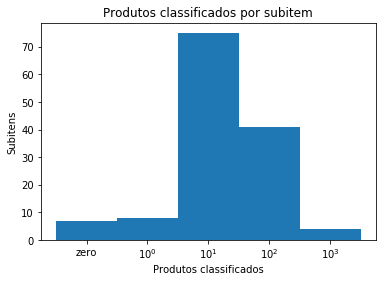

In [7]:
x = dados.produtos.apply(np.log10)
x_bins = int(np.ceil(max(x))) + 1
x_labels = ['zero'] + ['$10^' + str(i) + '$' for i in range(0, x_bins - 1)]

plt.hist(x, bins = x_bins, range = (-1, x_bins - 1) )

plt.xticks(np.arange(-0.5, x_bins - 1), x_labels)
plt.xlabel('Produtos classificados')
plt.ylabel('Subitens')
plt.title('Produtos classificados por subitem')

plt.savefig('hist_subitens.png')
plt.show()

In [5]:
test = 20
result = sum(x < np.log10(test))
print('Existem', str(result), 'subitens com menos de', str(test), 'produtos.')

Existem 32 subitens com menos de 20 produtos.


In [6]:
total = int(sum(dados.produtos[~nan_boolean & ~zero_boolean]))
print('Total de produtos =', str(total))

Total de produtos = 21320


In [32]:
dados.loc[dados.produtos < 1]

subitem  produtos
4                                              ABÓBORA       0.1
39                                        PÃO DE FORMA       0.1
86                                              CAVALA       0.1
127                                   SOPA DESIDRATADA       0.1
129  ALIMENTOS PREPARADOS E CONGELADOS DE CARNE BOVINA       0.1
131                     MASSAS PREPARADAS E CONGELADAS       0.1
134                          PÃO DE FORMA DIET / LIGHT       0.1

In [42]:
dados.loc[np.logical_and(dados.produtos >= 1, dados.produtos <= 10)]

subitem  produtos
3            FEIJÃO-MULATINHO       2.0
20            BANANA DA TERRA       7.0
38                PÃO FRANCÊS      10.0
42                   PÃO DOCE      10.0
70              FÍGADO BOVINO       7.0
83         PALETA DE CARNEIRO       3.0
84        COSTELA DE CARNEIRO       4.0
87                    CORVINA       3.0
89                   NAMORADO       3.0
91                    PESCADA       6.0
119  POLPA DE FRUTA CONGELADA      10.0